## Import Modules

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
from IPython.display import clear_output

import time

In [17]:
# load and preprocess the image
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (1280, 720))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray_image

# subtract images
def subtract_images(image1, image2):
    diff = cv2.absdiff(image1, image2)
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)
    return diff, thresh

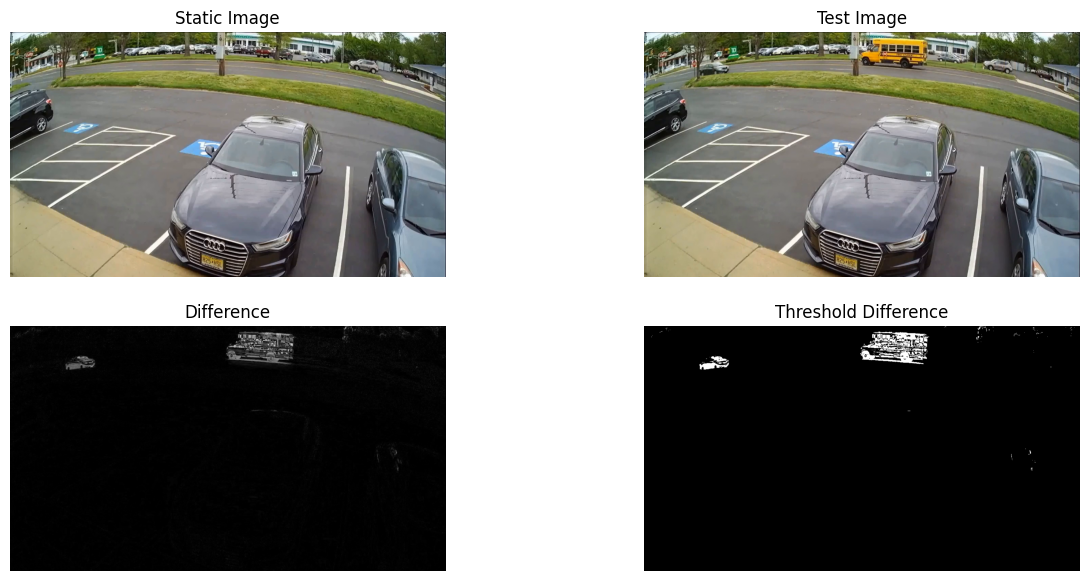

In [18]:
image_path1 = 'static.png'
image_path2 = 'test.png'

image1, gray_image1 = load_and_preprocess(image_path1)
image2, gray_image2 = load_and_preprocess(image_path2)

# subtract the images
diff, thresh = subtract_images(gray_image1, gray_image2)

# plot the images
plt.figure(figsize=(15, 7))

plt.subplot(2, 2, 1)
plt.title('Static Image')
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Test Image')
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Difference')
plt.imshow(diff, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Threshold Difference')
plt.imshow(thresh, cmap='gray')
plt.axis('off')

plt.show()

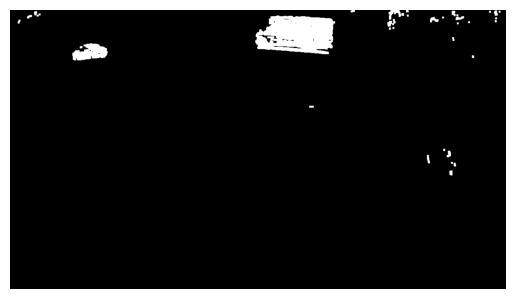

In [19]:
dilated_image = cv2.dilate(thresh, None, iterations=2)
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')
plt.show()

In [20]:
contours = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
# cnts

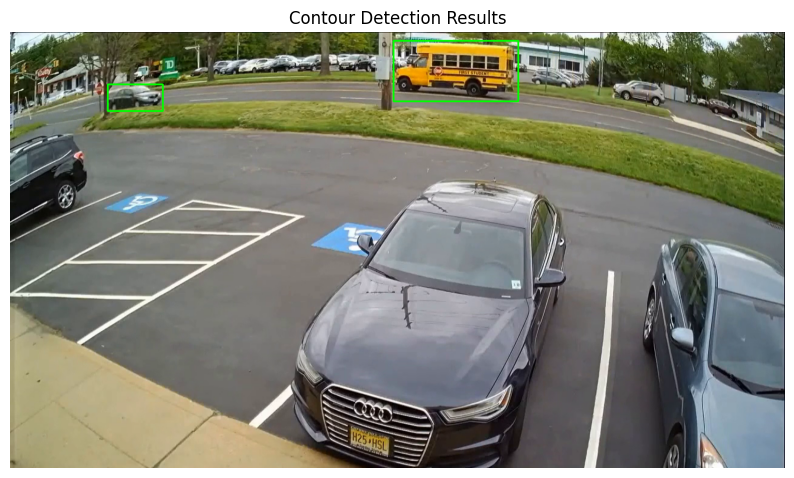

In [23]:
# iterate the contours
for c in contours:
    if cv2.contourArea(c) < 780:
        continue
    
    # Get bounding box coordinates
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display using matplotlib instead of cv2.imshow
plt.figure(figsize=(10, 8))
# Convert BGR to RGB for matplotlib
if len(image2.shape) == 3:
    image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
else:
    image_rgb = image2
plt.imshow(image_rgb, cmap='gray' if len(image2.shape) == 2 else None)
plt.title('Contour Detection Results')
plt.axis('off')
plt.show()

## Test in Realtime / Video

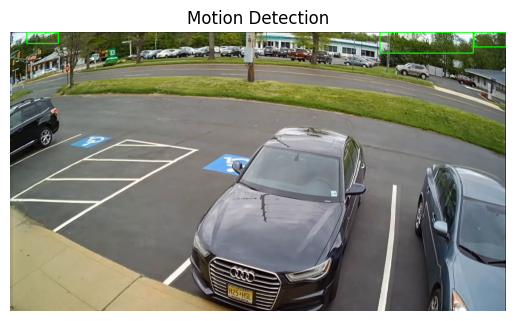

In [ ]:
def subtract_images(static_frame, moving_frame):
    diff = cv2.absdiff(static_frame, moving_frame)
    thresh = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    return diff, thresh

video_path = 'test.mp4'
video_cap = cv2.VideoCapture(video_path)
static_frame = None

while True:
    success, frame = video_cap.read()
    if not success:
        break

    frame = cv2.resize(frame, (1280, 720))
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    if static_frame is None:
        static_frame = gray_frame
        continue

    diff, thresh = subtract_images(static_frame, gray_frame)
    dilated_image = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(dilated_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    for c in cnts:
        if cv2.contourArea(c) < 700:
            continue

        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title("Motion Detection")
    plt.axis("off")
    plt.show()
    time.sleep(0.05)
    clear_output(wait=True)

video_cap.release()